# Visualizing distributions of data


- 데이터를 분석하거나 모델링하려는 모든 노력의 초기 단계는 변수가 어떻게 분포되어 있는지 이해하는 것이어야 합니다. 분포 시각화 기법은 여러 가지 중요한 질문에 대한 빠른 답을 제공할 수 있습니다. 관찰 범위는 어느 정도인가? 중심 경향은 무엇인가? 한 방향으로 심하게 치우쳐 있는가? 바이모달리티에 대한 증거가 있는가? 유의미한 이상값이 있는가? 이러한 질문에 대한 답이 다른 변수에 의해 정의된 하위 집합에 따라 달라지는가?

- 분포 모듈에는 이와 같은 질문에 답하도록 설계된 여러 함수가 포함되어 있습니다. 축 수준 함수는 histplot(), kdeplot(), ecdfplot() 및 rugplot()입니다. 이러한 함수는 그림 수준인 displot(), jointplot() 및 pairplot() 함수 내에서 함께 그룹화됩니다.

- 분포를 시각화하는 데는 여러 가지 접근 방식이 있으며, 각 접근 방식에는 상대적인 장단점이 있습니다. 특정 목적에 가장 적합한 접근 방식을 선택할 수 있도록 이러한 요소를 이해하는 것이 중요합니다.

## Plotting univariate histograms


- 분포를 시각화하는 가장 일반적인 접근 방식은 히스토그램일 것입니다. 
- 히스토그램은 displot()의 기본 접근 방식으로, 히스토그램은 histplot()과 동일한 기본 코드를 사용합니다. 
- 히스토그램은 데이터 변수를 나타내는 축을 불연속 구간차원 집합으로 나누고 각 구간차원에 속하는 관측값의 개수를 해당 막대의 높이를 사용하여 표시하는 막대형 차트입니다:

In [2]:
import seaborn as sns 

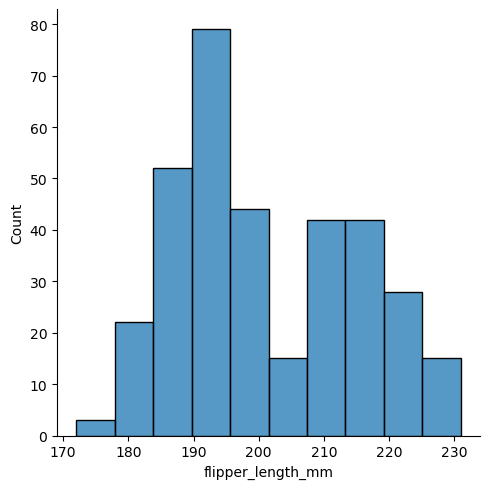

In [3]:
penguins = sns.load_dataset('penguins')
sns.displot(penguins, x='flipper_length_mm');

- 이 플롯은 flipper_length_mm 변수에 대한 몇 가지 인사이트를 즉시 제공합니다. 
- 예를 들어, 가장 일반적인 플리퍼 길이는 약 195mm이지만 분포가 이원형으로 나타나므로 이 한 가지 숫자로는 데이터를 잘 나타내지 못한다는 것을 알 수 있습니다.

### Choosing bin size

- 구간차원의 크기는 중요한 매개 변수이며, 잘못된 구간차원 크기를 사용하면 데이터의 중요한 특징이 가려지거나 임의의 변동성으로 인해 명백한 특징이 만들어져 오해의 소지가 있을 수 있습니다. 
- 기본적으로 displot()/histplot()은 데이터의 분산과 관찰 횟수를 기준으로 기본 구간차원 크기를 선택합니다. 
- 그러나 이러한 자동 접근 방식은 데이터 구조에 대한 특정 가정에 의존하기 때문에 지나치게 의존해서는 안 됩니다. 
- 항상 다양한 구간차원 크기에서 분포에 대한 노출이 일관성이 있는지 확인하는 것이 좋습니다. 크기를 직접 선택하려면 빈폭 매개변수를 설정합니다:

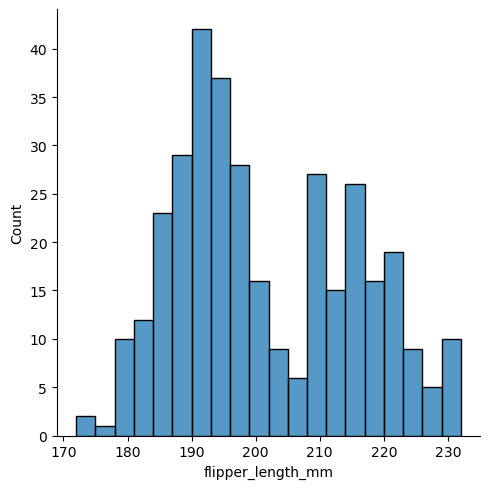

In [4]:
sns.displot(penguins, x='flipper_length_mm', binwidth=3);

- 다른 상황에서는 size보다 bins의 개수를 지정하는 것이 더 합리적일 수 있습니다:

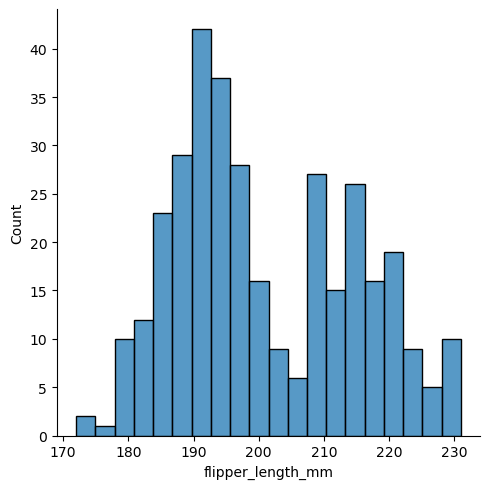

In [5]:
sns.displot(penguins, x='flipper_length_mm', bins=20);

- 기본값이 실패하는 상황의 한 가지 예는 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우입니다. 
- 이 경우 기본 구간차원 너비가 너무 작아 분포에 어색한 간격이 생길 수 있습니다:

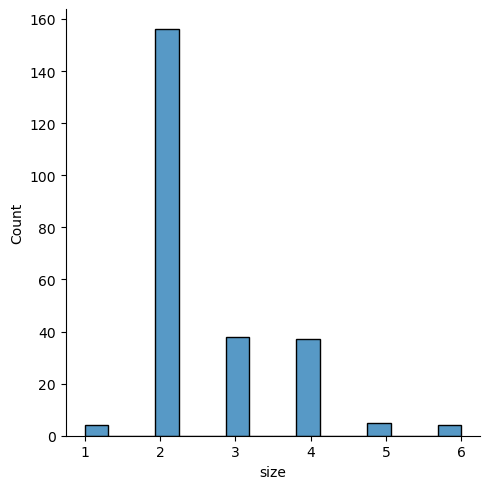

In [6]:
tips = sns.load_dataset('tips')
sns.displot(tips, x='size');

- 한 가지 접근 방식은 빈에 배열을 전달하여 정확한 빈 나누기를 지정하는 것입니다:

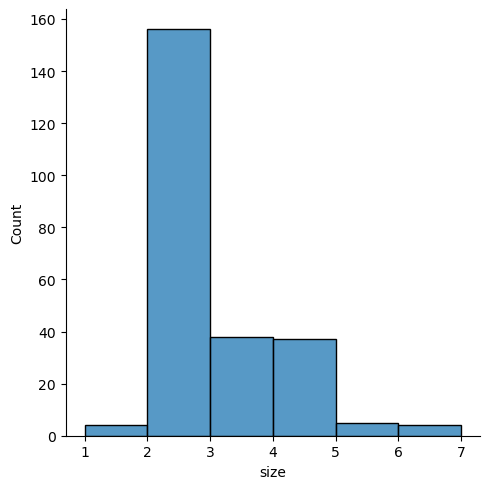

In [7]:
sns.displot(tips, x='size', bins=[1,2,3,4,5,6,7]);

- discrete=True를 설정하여 데이터 집합의 고유 값을 나타내는 구간차원 나누기를 해당 값을 중심으로 막대가 있는 막대로 선택할 수도 있습니다.

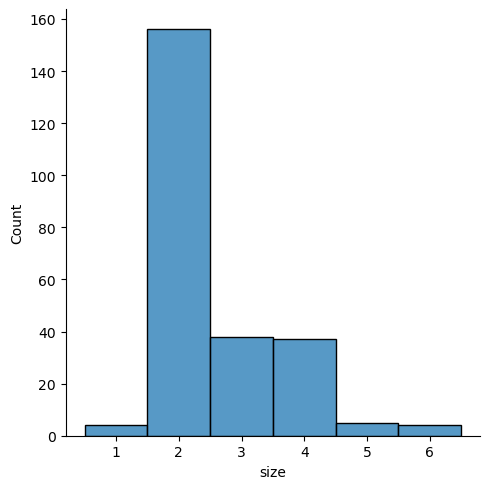

In [8]:
sns.displot(tips, x='size', discrete=True);

- 히스토그램의 논리를 사용하여 범주형 변수의 분포를 시각화할 수도 있습니다. 
- 범주형 변수의 경우 불연속형 구간차원이 자동으로 설정되지만, 축의 범주적 특성을 강조하기 위해 막대를 약간 '축소'하는 것도 도움이 될 수 있습니다:

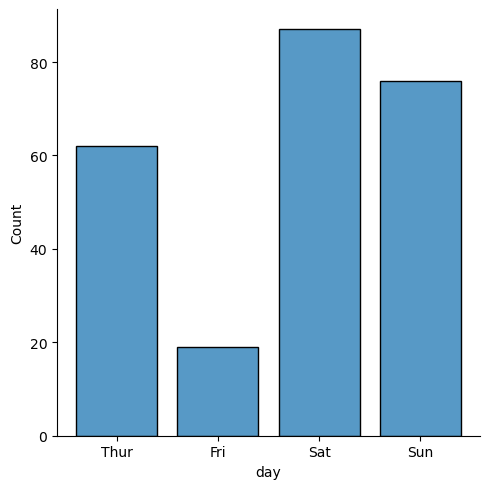

In [9]:
sns.displot(tips, x='day', shrink=.8);

### Conditioning on other variables


- 변수의 분포를 이해했다면, 다음 단계는 데이터 집합의 다른 변수에 따라 해당 분포의 특징이 다른지 물어보는 것입니다. 
- 예를 들어, 위에서 본 플리퍼 길이의 바이모달 분포를 설명하는 것은 무엇일까요? displot() 및 histplot() 함수는 색조 시맨틱을 통해 조건부 하위 집합을 지원합니다. 
- 색조에 변수를 할당하면 각각의 고유 값에 대해 별도의 히스토그램이 그려지고 색상으로 구분됩니다:

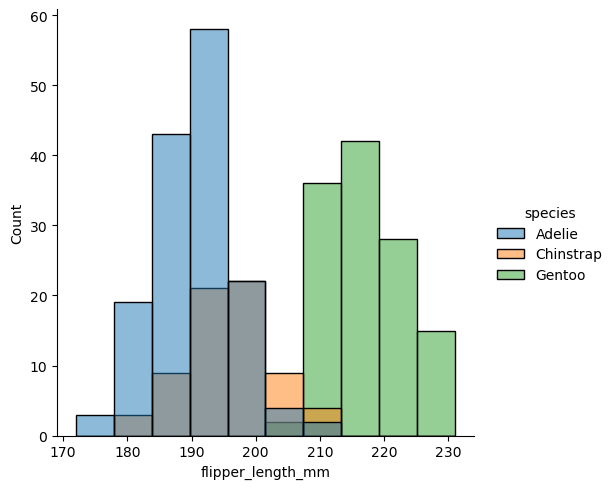

In [10]:
sns.displot(penguins, x='flipper_length_mm', hue='species')

- 기본적으로 서로 다른 히스토그램은 서로 위에 '겹쳐져' 표시되며 경우에 따라 구분하기 어려울 수 있습니다. 
- 한 가지 옵션은 히스토그램의 시각적 표현을 막대형 플롯에서 'step' 플롯으로 변경하는 것입니다:

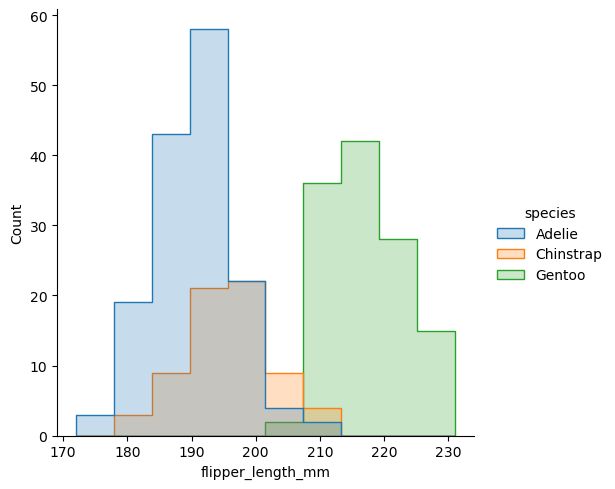

In [11]:
sns.displot(penguins, x='flipper_length_mm', hue='species', element='step')

- 또는 각 막대를 겹겹이 쌓는 대신 "stacked"하거나 수직으로 이동할 수 있습니다. 
- 이 플롯에서는 전체 히스토그램의 윤곽이 단일 변수만 있는 플롯과 일치합니다:

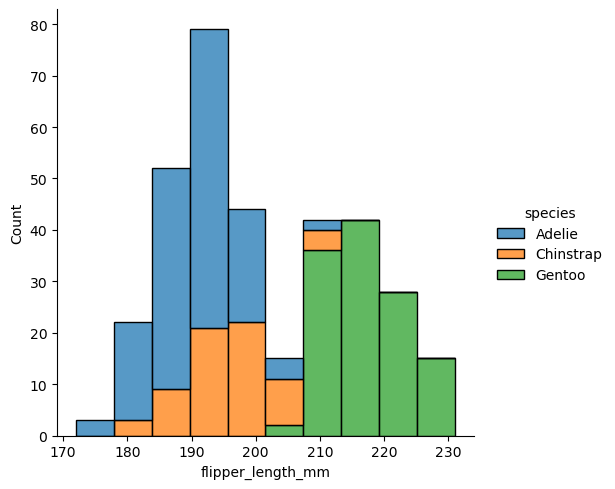

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack");

- 누적 히스토그램은 변수 간의 부분과 전체 관계를 강조하지만 다른 특징을 가릴 수 있습니다(예: 아델리 분포의 모드를 파악하기 어렵습니다). 
- 또 다른 옵션은 막대를 가로로 이동하고 너비를 줄이는 '닷지'입니다. 
- 이렇게 하면 겹치는 부분이 없고 막대의 높이가 비슷하게 유지됩니다. 
- 그러나 범주형 변수의 수준 수가 적은 경우에만 잘 작동합니다:

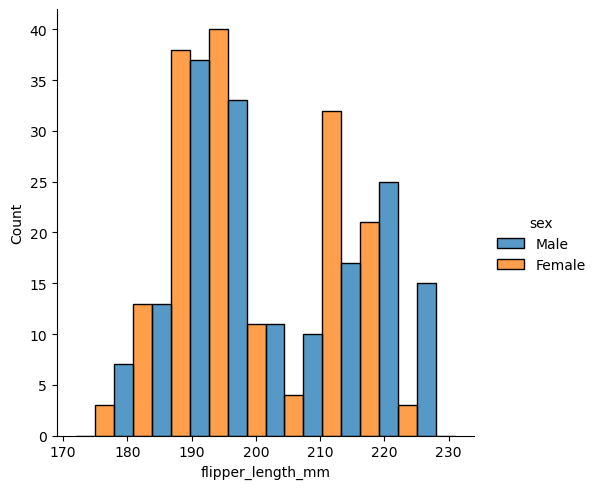

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge");

- displot()은 그림 수준 함수이고 패싯그리드에 그려지기 때문에 두 번째 변수를 색조 대신(또는 색조와 함께) 열이나 행에 할당하여 각각의 개별 분포를 별도의 하위 플롯에 그릴 수도 있습니다. 
- 이렇게 하면 각 하위 집합의 분포를 잘 나타내지만 직접 비교하기는 더 어렵습니다:

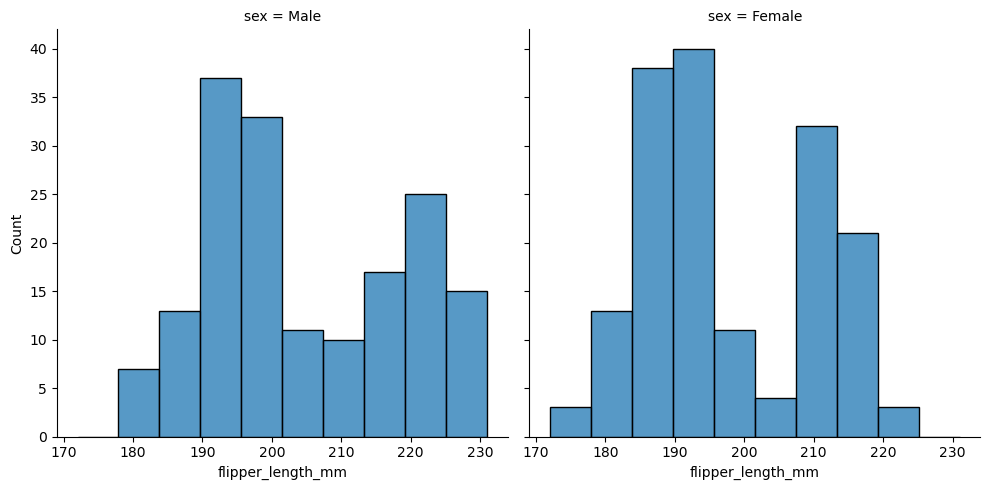

In [14]:
sns.displot(penguins, x='flipper_length_mm', col='sex');

이러한 접근 방식 중 어느 것도 완벽하지는 않으며, 곧 비교 작업에 더 적합한 히스토그램에 대한 몇 가지 대안을 보게 될 것입니다.

## Normalized histogram statistics

- 이 작업을 수행하기 전에 주의해야 할 또 다른 사항은 하위 집합의 관측값 수가 같지 않은 경우 개수 측면에서 분포를 비교하는 것이 이상적이지 않을 수 있다는 것입니다. 
- 한 가지 해결책은 stat 매개변수를 사용하여 카운트를 정규화하는 것입니다:

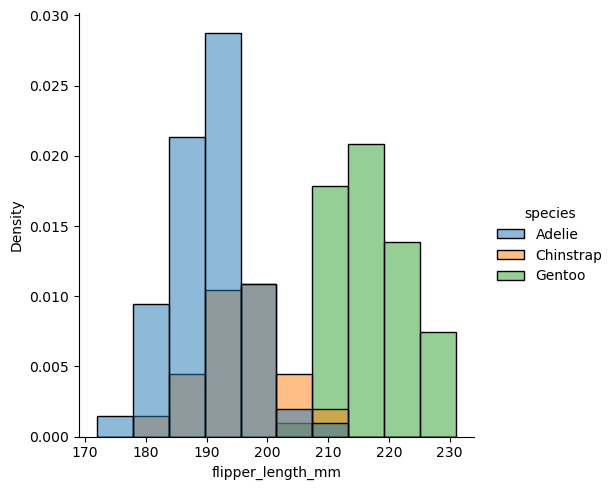

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density");

- 그러나 기본적으로 정규화는 전체 분포에 적용되므로 막대의 높이를 재조정하기만 하면 됩니다. 
- common_norm=False로 설정하면 각 하위 집합이 독립적으로 정규화됩니다:


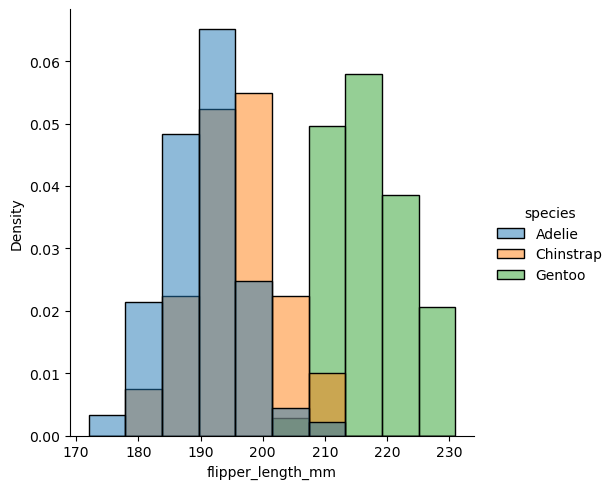

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False);

- 밀도 정규화는 막대의 크기를 조정하여 영역의 합이 1이 되도록 합니다. 
- 결과적으로 밀도 축을 직접 해석할 수 없습니다. 또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것입니다. 
- 이 옵션은 변수가 불연속형일 때 가장 적합하지만 모든 히스토그램에 사용할 수 있는 옵션입니다:





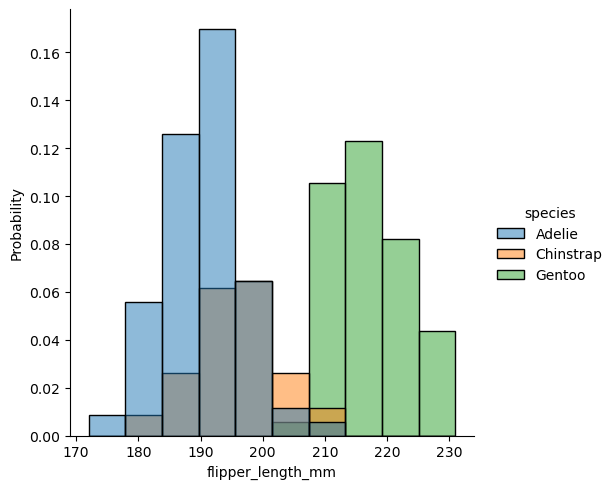

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability");